`Projeto 02 - Parte 2.`

# <center> Análise sobre Veículos Usados - Kaggle - (Parte 2) </center>



    Este dataset foi retirado do `Kaggle` e contém informações a respeito de veículos usados na Alemanha e que estão à venda no Ebay.

    Objetivos dessa abordagem:
    
        # Calcular a Média de preço por marca e por veículo e 
        # Visualizar esses dados em um HeatMap
               
    

- Dataset: https://www.kaggle.com/orgesleka/used-cars-database
- Créditos: DSA - Python Fundamentos Para Análise de Dados

In [1]:
from platform import python_version
print(f"Versão Python: {python_version()}")

Versão Python: 3.8.12


In [2]:
# Imports
import os
import subprocess
import stat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mat
import matplotlib.pyplot as plt
from datetime import datetime
sns.set(style="white")
%matplotlib inline

In [3]:
# Dataset
datasetAutos = "dataset/autos.csv"
df = pd.read_csv(datasetAutos,encoding="latin-1")

In [4]:
trial = pd.DataFrame()
for b in list(df["brand"].unique()):
    for v in list(df["vehicleType"].unique()):
        z = df[(df["brand"] == b) & (df["vehicleType"] == v)]["price"].mean()
        trial = trial.append(pd.DataFrame({'brand':b , 'vehicleType':v , 'avgPrice':z}, index=[0]))
trial = trial.reset_index()
del trial["index"]
trial["avgPrice"].fillna(0,inplace=True)
trial["avgPrice"].isnull().value_counts()
trial["avgPrice"] = trial["avgPrice"].astype(int)
trial.head(10)

,brand,vehicleType,avgPrice
0,volkswagen,Other,897
1,volkswagen,coupe,8014
2,volkswagen,suv,13946
3,volkswagen,kleinwagen,1626
4,volkswagen,limousine,3743
5,volkswagen,cabrio,5784
6,volkswagen,kombi,3902
7,volkswagen,bus,5881
8,volkswagen,andere,2597
9,audi,Other,1012


### <font color = "blue"> HeatMap </font>

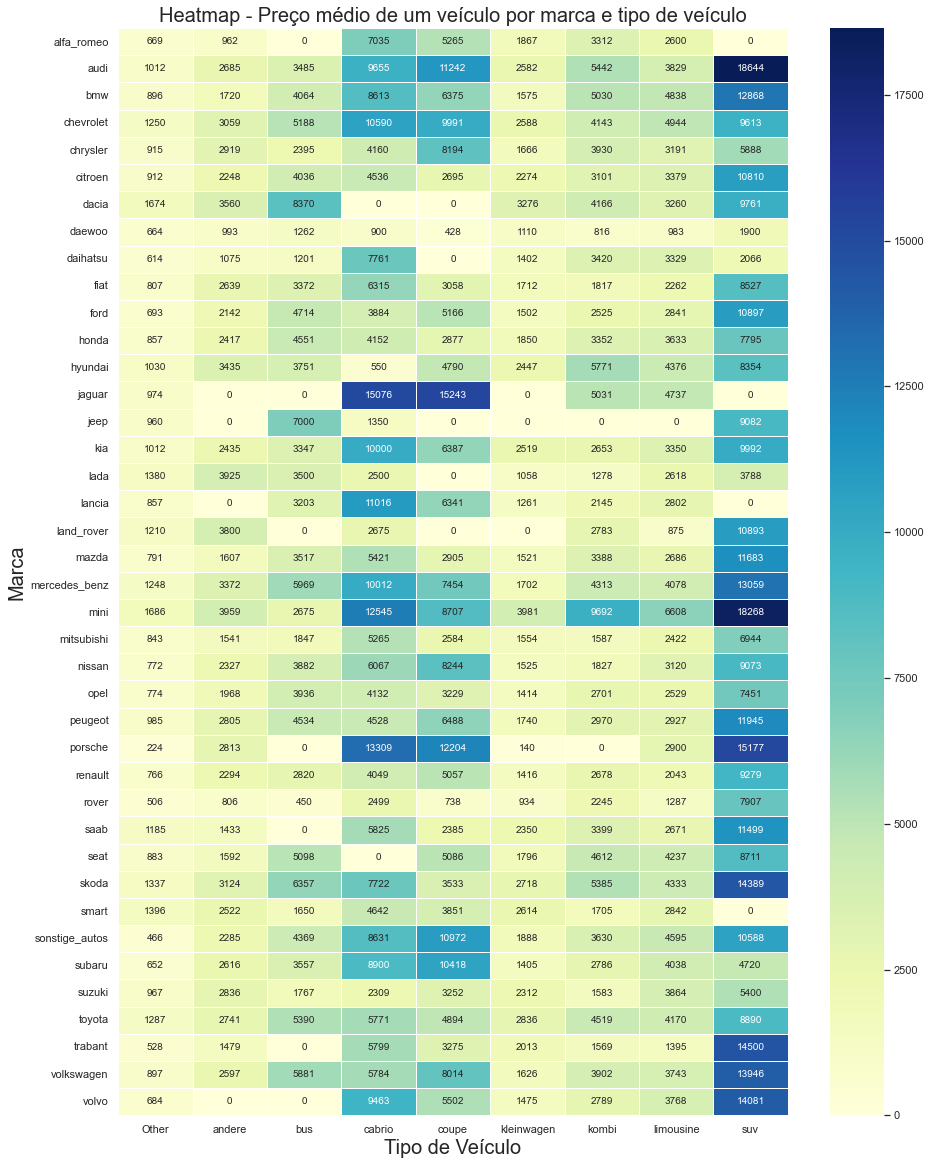

In [5]:
tri = trial.pivot("brand","vehicleType", "avgPrice")
fig, ax = plt.subplots(figsize=(15,20))
sns.heatmap(tri,linewidths=1,cmap="YlGnBu",annot=True, ax=ax, fmt="d")
ax.set_title("Heatmap - Preço médio de um veículo por marca e tipo de veículo",fontdict={'size':20})
ax.xaxis.set_label_text("Tipo de Veículo",fontdict= {'size':20})
ax.yaxis.set_label_text("Marca",fontdict= {'size':20})
plt.show()

FIM

Obrigada.